## Imports

In [100]:
import numpy as np
import torch
from torchvision import datasets, transforms
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Define transform to normalize the data

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [5]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

## Download and load training data

In [8]:
trainset = datasets.MNIST("~/.pytorch/MNIST_data/", download=True, train=True, transform=transform)

In [9]:
trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/amog/.pytorch/MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [10]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
train_loader

 The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch.

In [11]:
data_iter = iter(train_loader)
images, labels = next(data_iter)
images.shape
labels.shape

torch.Size([64, 1, 28, 28])

torch.Size([64])

We can see that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

tensor(8)

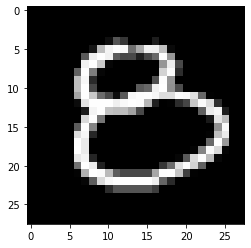

In [24]:
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r')
labels[2]

In [26]:
images.view(-1, 784).shape

torch.Size([64, 784])

In [92]:
def sigmoid(x):
    """
    Activation function
    """
    return 1 / (1 + torch.exp(-x))

In [35]:
input_units = 784
hidden_units = 256
output_units = 10

batch_size = images.shape[0]
images = images.view((-1, input_units))                # Flatten the images

w1 = torch.randn((input_units, hidden_units))          # Hidden layer
w2 = torch.randn((hidden_units, output_units))         # Output layer

b1 = torch.randn((1, hidden_units))                    # Hidden layer bias
b2 = torch.randn((1, output_units))                    # Output layer bias

h1 = sigmoid(torch.mm(images, w1) + b1)                # activation(wx + b) on hidden layer
h2 = sigmoid(torch.mm(h1, w2) + b2)                    # activation(wx + b) on output layer

h2.shape # for each image, we have 10 outputs

torch.Size([64, 10])

## Softmax function

We have to have outputs per image to be in 10 classes whose sum should add up to 1

In [43]:
a = torch.exp(-h2[0])

In [44]:
a

tensor([1.0000, 0.5767, 1.0000, 0.9981, 0.9651, 0.3913, 0.9943, 1.0000, 0.3679,
        0.9834])

In [81]:
sum(a)

tensor(8.2767)

In [47]:
a / torch.sum(a)

tensor([0.1208, 0.0697, 0.1208, 0.1206, 0.1166, 0.0473, 0.1201, 0.1208, 0.0445,
        0.1188])

In [80]:
sum(a / torch.sum(a))

tensor(1.)

We can see that the sum is 1. Now we have to do it on whole tensor

In [83]:
exp_tensor = torch.exp(-h2)

In [84]:
exp_tensor

tensor([[1.0000, 0.5767, 1.0000, 0.9981, 0.9651, 0.3913, 0.9943, 1.0000, 0.3679,
         0.9834],
        [1.0000, 0.9899, 0.9911, 0.9984, 0.7812, 0.3684, 0.5936, 1.0000, 0.9999,
         0.8942],
        [1.0000, 0.7817, 0.8755, 1.0000, 0.3679, 0.3679, 0.9992, 1.0000, 0.4527,
         0.9608],
        [1.0000, 0.3683, 0.9806, 0.9999, 0.3727, 0.3679, 0.9824, 1.0000, 0.9999,
         0.3979],
        [1.0000, 0.3705, 0.9995, 0.9997, 0.3695, 0.3679, 0.3707, 1.0000, 0.5539,
         0.6568],
        [1.0000, 0.3679, 0.9994, 1.0000, 0.4626, 0.3679, 0.3679, 1.0000, 0.3680,
         0.3681],
        [1.0000, 0.9658, 0.9961, 0.7221, 0.3679, 0.3679, 0.3679, 1.0000, 0.3691,
         0.9930],
        [1.0000, 0.3681, 0.8292, 1.0000, 0.3710, 0.3681, 0.4347, 1.0000, 0.3720,
         0.3716],
        [1.0000, 0.9493, 1.0000, 1.0000, 0.3680, 0.9886, 0.9998, 1.0000, 0.6244,
         0.9995],
        [1.0000, 0.8287, 0.7316, 0.4720, 0.3679, 0.3679, 0.6908, 1.0000, 0.4775,
         0.9076],
        [1

In [88]:
exp_sum = torch.sum(exp_tensor, 1).view((64, -1))
exp_sum

tensor([[8.2767],
        [8.6166],
        [7.8058],
        [7.4696],
        [6.6885],
        [6.3018],
        [7.1498],
        [6.1147],
        [8.9298],
        [6.8440],
        [6.4295],
        [8.5209],
        [7.2133],
        [7.8367],
        [7.9047],
        [6.3237],
        [6.6206],
        [7.6057],
        [7.0640],
        [7.1595],
        [7.4094],
        [6.3351],
        [6.5478],
        [7.0921],
        [5.7621],
        [7.6857],
        [7.4787],
        [6.4775],
        [6.2688],
        [6.3368],
        [6.5152],
        [6.5778],
        [7.9030],
        [7.1541],
        [8.0138],
        [6.5860],
        [6.3970],
        [7.2875],
        [8.3338],
        [5.1285],
        [6.9075],
        [7.0458],
        [8.4333],
        [7.7314],
        [6.8266],
        [7.2033],
        [6.7984],
        [7.3178],
        [6.5508],
        [7.2182],
        [7.8842],
        [6.4338],
        [8.1656],
        [7.5109],
        [6.7918],
        [6

In [89]:
softmax = exp_tensor / exp_sum
softmax

tensor([[0.1208, 0.0697, 0.1208, 0.1206, 0.1166, 0.0473, 0.1201, 0.1208, 0.0445,
         0.1188],
        [0.1161, 0.1149, 0.1150, 0.1159, 0.0907, 0.0428, 0.0689, 0.1161, 0.1160,
         0.1038],
        [0.1281, 0.1001, 0.1122, 0.1281, 0.0471, 0.0471, 0.1280, 0.1281, 0.0580,
         0.1231],
        [0.1339, 0.0493, 0.1313, 0.1339, 0.0499, 0.0493, 0.1315, 0.1339, 0.1339,
         0.0533],
        [0.1495, 0.0554, 0.1494, 0.1495, 0.0552, 0.0550, 0.0554, 0.1495, 0.0828,
         0.0982],
        [0.1587, 0.0584, 0.1586, 0.1587, 0.0734, 0.0584, 0.0584, 0.1587, 0.0584,
         0.0584],
        [0.1399, 0.1351, 0.1393, 0.1010, 0.0515, 0.0515, 0.0515, 0.1399, 0.0516,
         0.1389],
        [0.1635, 0.0602, 0.1356, 0.1635, 0.0607, 0.0602, 0.0711, 0.1635, 0.0608,
         0.0608],
        [0.1120, 0.1063, 0.1120, 0.1120, 0.0412, 0.1107, 0.1120, 0.1120, 0.0699,
         0.1119],
        [0.1461, 0.1211, 0.1069, 0.0690, 0.0538, 0.0538, 0.1009, 0.1461, 0.0698,
         0.1326],
        [0

In [90]:
sum(softmax[0])

tensor(1.)

As we can see, the output adds uppto one here!

In [96]:
def softmax(tensor_a):
    exp_tensor = torch.exp(-h2)
    exp_sum = torch.sum(exp_tensor, dim=1).view((64, -1))
    return exp_tensor / exp_sum

In [93]:
probabilities = softmax(h2)

In [94]:
probabilities.shape

torch.Size([64, 10])

In [95]:
torch.sum(probabilities, dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

Looks good!

## Building network through pytorch

In [98]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256, bias=True)
        # inputs to output layer with 10 classes
        self.output = nn.Linear(256, 10, bias=True)
        
        # define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of the operation
        
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

```python
class Network(nn.Module):
```

Here we're inheriting from nn.Module. Combined with super().__init__() this creates a class that tracks the architecture and provides a lot of useful methods and attributes. It is mandatory to inherit from nn.Module when you're creating a class for your network. The name of the class itself can be anything.

```python
self.hidden = nn.Linear(784, 256)
```
This line creates a module for a linear transformation,  𝑥𝐖+𝑏 , with 784 inputs and 256 outputs and assigns it to self.hidden. The module automatically creates the weight and bias tensors which we'll use in the forward method. You can access the weight and bias tensors once the network (net) is created with net.hidden.weight and net.hidden.bias.

```python
self.output = nn.Linear(256, 10)
```
Similarly, this creates another linear transformation with 256 inputs and 10 outputs.

```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```
Here I defined operations for the sigmoid activation and softmax output. Setting dim=1 in nn.Softmax(dim=1) calculates softmax across the columns.

```python
def forward(self, x):
```
PyTorch networks created with nn.Module must have a forward method defined. It takes in a tensor x and passes it through the operations you defined in the __init__ method.

```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```
Here the input tensor x is passed through each operation and reassigned to x. We can see that the input tensor goes through the hidden layer, then a sigmoid function, then the output layer, and finally the softmax function. It doesn't matter what you name the variables here, as long as the inputs and outputs of the operations match the network architecture you want to build. The order in which you define things in the __init__ method doesn't matter, but you'll need to sequence the operations correctly in the forward method.

In [99]:
Network()

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

## Functional module pytorch

We can do these things more concisely and clearly using the `torch.nn.functional` module

In [104]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        # inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256, bias=True)
        # inputs to output layer with 10 classes
        self.output = nn.Linear(256, 10, bias=True)
        
    def forward(self, x):
        # Pass the input tensor through each of the operation
        
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
    
        return x

In [105]:
Network()

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

## Use ReLu as activation function

In [106]:
class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 128, bias=True)
        self.fc2 = nn.Linear(128, 64, bias=True)
        self.fc3 = nn.Linear(64, 10, bias=True)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.output(x), dim=1)
        return x

In [107]:
model = Network()

In [111]:
model.fc1.weight
model.fc1.bias

Parameter containing:
tensor([[-0.0193, -0.0167,  0.0210,  ...,  0.0223,  0.0291, -0.0133],
        [ 0.0215, -0.0284, -0.0357,  ..., -0.0227, -0.0167,  0.0341],
        [ 0.0054, -0.0292, -0.0304,  ..., -0.0090,  0.0034,  0.0075],
        ...,
        [ 0.0131,  0.0345, -0.0220,  ...,  0.0344, -0.0295,  0.0275],
        [ 0.0221, -0.0034, -0.0208,  ...,  0.0210, -0.0257, -0.0282],
        [-0.0304,  0.0198,  0.0025,  ...,  0.0061, -0.0062, -0.0158]],
       requires_grad=True)

Parameter containing:
tensor([ 0.0085,  0.0105, -0.0260,  0.0227, -0.0104,  0.0355,  0.0287,  0.0235,
        -0.0169, -0.0057, -0.0033,  0.0316,  0.0087,  0.0241, -0.0096,  0.0144,
        -0.0337,  0.0177, -0.0336, -0.0102,  0.0188,  0.0034, -0.0345, -0.0208,
         0.0174, -0.0082,  0.0300, -0.0227,  0.0153, -0.0040,  0.0177, -0.0099,
         0.0195,  0.0317,  0.0286,  0.0013, -0.0027, -0.0163,  0.0261, -0.0231,
         0.0158,  0.0088, -0.0251, -0.0152, -0.0202, -0.0094,  0.0161,  0.0087,
         0.0224, -0.0127,  0.0349, -0.0310, -0.0176,  0.0337,  0.0061, -0.0255,
         0.0109, -0.0016, -0.0002,  0.0032,  0.0184,  0.0097,  0.0080,  0.0287,
        -0.0197,  0.0194,  0.0093,  0.0311,  0.0080,  0.0122,  0.0185,  0.0014,
        -0.0256,  0.0154,  0.0284, -0.0299,  0.0132,  0.0157, -0.0308,  0.0260,
         0.0136,  0.0327, -0.0255, -0.0002, -0.0291, -0.0006, -0.0229,  0.0213,
        -0.0340, -0.0214, -0.0004, -0.0284, -0.0153,  0.0156,  0.0002,  0.0051,
        -0.0090, -

In [113]:
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [114]:
model.fc1.bias

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [115]:
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0019,  0.0076,  0.0088,  ..., -0.0084,  0.0004,  0.0010],
        [-0.0013, -0.0228, -0.0050,  ...,  0.0149,  0.0009, -0.0116],
        [ 0.0063,  0.0160,  0.0050,  ...,  0.0132, -0.0130, -0.0019],
        ...,
        [-0.0005,  0.0052, -0.0152,  ..., -0.0044, -0.0094,  0.0101],
        [ 0.0004, -0.0101,  0.0001,  ..., -0.0089,  0.0020, -0.0047],
        [ 0.0048, -0.0181,  0.0127,  ..., -0.0025, -0.0072,  0.0082]])